## Reading and Exploring Data

In [1]:
import pandas as pd
import seaborn as sns
import re
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')


/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#As dataset is big, we will w
raw_df = pd.read_csv('blogtext.csv')
df = raw_df[:30000]

In [3]:
df.head(10)

,id,gender,age,topic,sign,date,text
0,2059027,male,15,Student,Leo,"14,May,2004","Info has been found (+/- 100 pages,..."
1,2059027,male,15,Student,Leo,"13,May,2004",These are the team members: Drewe...
2,2059027,male,15,Student,Leo,"12,May,2004",In het kader van kernfusie op aarde...
3,2059027,male,15,Student,Leo,"12,May,2004",testing!!! testing!!!
4,3581210,male,33,InvestmentBanking,Aquarius,"11,June,2004",Thanks to Yahoo!'s Toolbar I can ...
5,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",I had an interesting conversation...
6,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Somehow Coca-Cola has a way of su...
7,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004","If anything, Korea is a country o..."
8,3581210,male,33,InvestmentBanking,Aquarius,"10,June,2004",Take a read of this news article ...
9,3581210,male,33,InvestmentBanking,Aquarius,"09,June,2004",I surf the English news sites a l...


In [4]:
df.shape

(30000, 7)

In [5]:
df.isnull().sum()

id        0
gender    0
age       0
topic     0
sign      0
date      0
text      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      30000 non-null  int64 
 1   gender  30000 non-null  object
 2   age     30000 non-null  int64 
 3   topic   30000 non-null  object
 4   sign    30000 non-null  object
 5   date    30000 non-null  object
 6   text    30000 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.6+ MB


In [7]:
df.describe(include = 'O')

,gender,topic,sign,date,text
count,30000,30000,30000,30000,30000
unique,2,38,12,1051,29679
top,male,indUnk,Aries,"05,August,2004",urlLink
freq,15948,12208,6856,2421,28


In [8]:
df.describe()

,id,age
count,3.000000e+04,30000.000000
mean,2.289198e+06,25.172333
std,1.270772e+06,8.021620
min,2.319100e+04,13.000000
25%,8.831780e+05,17.000000
50%,2.575852e+06,24.000000
75%,3.464884e+06,33.000000
max,4.337133e+06,48.000000


- There is no null value.
- There are only 2 columns with integer as value else all are object datatype.
- Gender column have 2 unique values with male as top class.
- Topic have 38 unique values with indUnk as top class.
- Sign have 12 unique values and Aries is top class.
- id and date is not going to help us in further modelling, dropping them.

In [9]:
# drop id and date columns
df.drop(labels=['id','date'], axis=1,inplace=True)

In [10]:
df.gender.value_counts()

male      15948
female    14052
Name: gender, dtype: int64

<AxesSubplot:xlabel='gender', ylabel='count'>

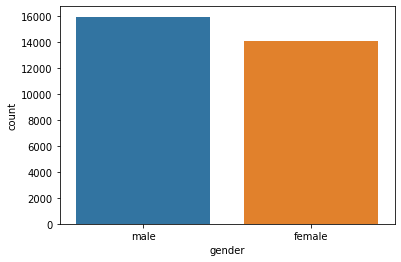

In [11]:
sns.countplot(x='gender',data=df)

- Values are quite similar for both of the classes in gender column.

<AxesSubplot:xlabel='sign', ylabel='count'>

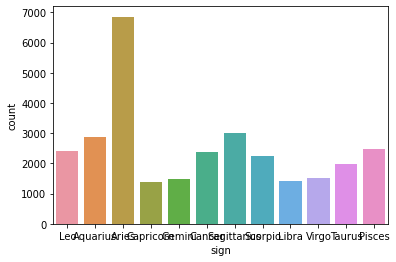

In [12]:
sns.countplot(x='sign',data=df)

<AxesSubplot:ylabel='sign'>

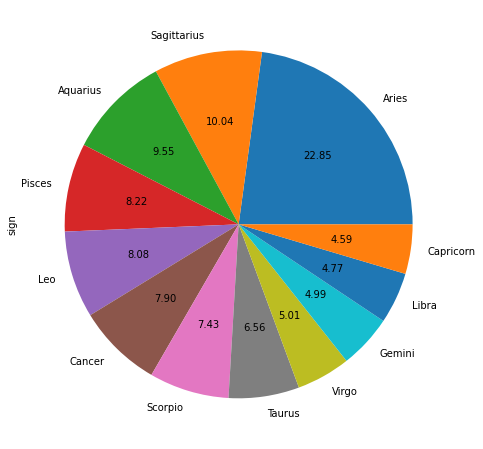

In [13]:
df['sign'].value_counts().plot(kind = 'pie',autopct = '%0.2f', figsize =(28,8))

- Aries is top class, all classes have similar share more or less, Capricorn have least values.

<AxesSubplot:ylabel='topic'>

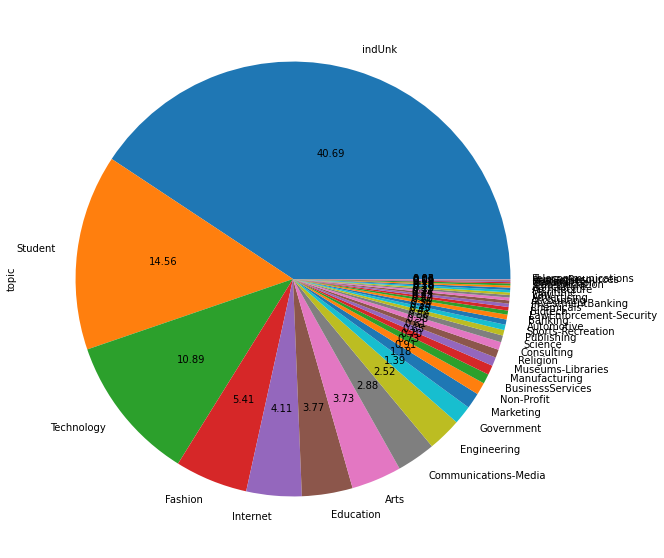

In [14]:
df['topic'].value_counts().plot(kind = 'pie',autopct = '%0.2f', figsize =(28,10))

- IndUnk is top class, also comprises of 40% values in the column, we need to treat this to make this column useful.
- Dropping indUnk

<AxesSubplot:ylabel='topic'>

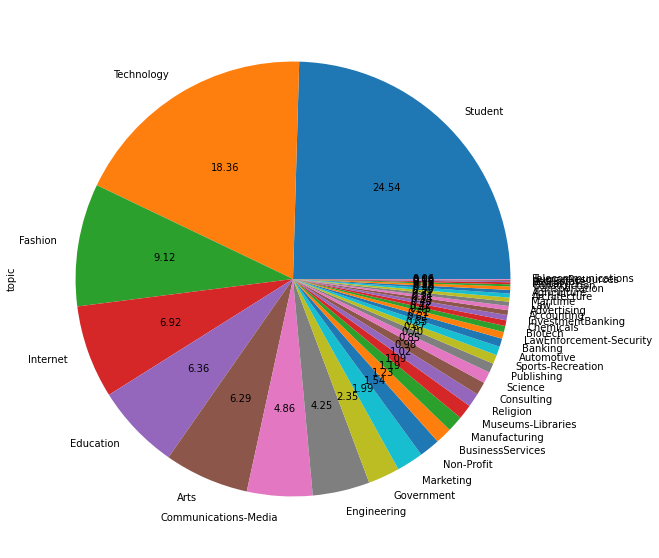

In [15]:
df = df[df['topic'] != 'indUnk']
df['topic'].value_counts().plot(kind = 'pie',autopct = '%0.2f', figsize =(28,10))

<AxesSubplot:ylabel='age'>

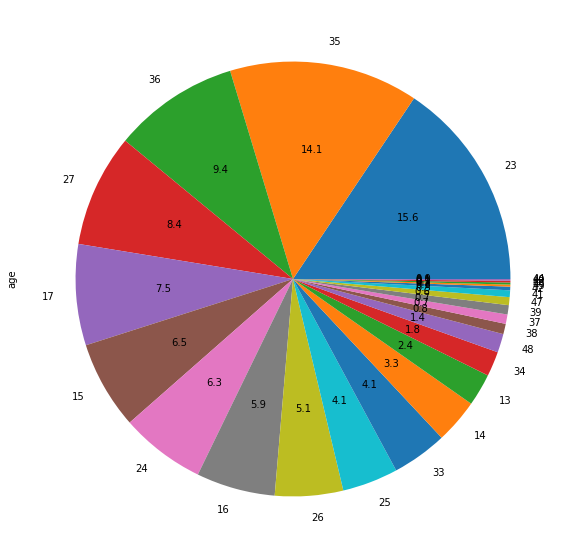

In [16]:
df['age'].value_counts().plot(kind = 'pie',autopct = '%0.1f', figsize =(28,10))

- Most of the review are from 20ish group people, they have more share in the chart from rest.

## Text Cleansing & Splitting

In [17]:
stopwords=set(stopwords.words('english')) 
#remove unwanted chars other than alphanumeric
df['clean_text'] = df.text.apply(lambda s : re.sub("[^\w ]" ,"",s))
df['clean_text'] = df.clean_text.apply(lambda s: s.strip())
df['clean_text'] = df.clean_text.apply(lambda s: s.lower())
df['clean_text'] = df.clean_text.apply(lambda t: ' '.join([words for words in t.split() if words not in stopwords]) )
df.head()

,gender,age,topic,sign,text,clean_text
0,male,15,Student,Leo,"Info has been found (+/- 100 pages,...",info found 100 pages 45 mb pdf files wait unti...
1,male,15,Student,Leo,These are the team members: Drewe...,team members drewes van der laag urllink mail ...
2,male,15,Student,Leo,In het kader van kernfusie op aarde...,het kader van kernfusie op aarde maak je eigen...
3,male,15,Student,Leo,testing!!! testing!!!,testing testing
4,male,33,InvestmentBanking,Aquarius,Thanks to Yahoo!'s Toolbar I can ...,thanks yahoos toolbar capture urls popupswhich...


In [18]:
df['labels'] = df.apply(lambda col : [col['gender'],col['age'],col['topic'],col['sign']], axis=1)
df.drop(columns=['gender','age','topic','sign','text'], axis=1, inplace=True)
df.head()

,clean_text,labels
0,info found 100 pages 45 mb pdf files wait unti...,"[male, 15, Student, Leo]"
1,team members drewes van der laag urllink mail ...,"[male, 15, Student, Leo]"
2,het kader van kernfusie op aarde maak je eigen...,"[male, 15, Student, Leo]"
3,testing testing,"[male, 15, Student, Leo]"
4,thanks yahoos toolbar capture urls popupswhich...,"[male, 33, InvestmentBanking, Aquarius]"


In [19]:
X= df['clean_text']
y = df['labels']
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=29,test_size = 0.25)

In [20]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13344,)
(13344,)
(4448,)
(4448,)


### Transform the labels

In [21]:
label_counts=dict()

for labels in df.labels.values:
    for label in labels:
        if label in label_counts:
            label_counts[str(label)]+=1
        else:
            label_counts[str(label)]=1

In [22]:
label_counts

{'male': 11162,
 '15': 1,
 'Student': 4367,
 'Leo': 1656,
 '33': 1,
 'InvestmentBanking': 71,
 'Aquarius': 1771,
 'female': 6630,
 '17': 1,
 'Gemini': 941,
 'Aries': 4890,
 '25': 1,
 'Non-Profit': 274,
 'Cancer': 1426,
 'Banking': 109,
 '27': 1,
 'Education': 1131,
 '24': 1,
 'Engineering': 756,
 'Libra': 794,
 'Science': 151,
 '41': 1,
 'Communications-Media': 865,
 'BusinessServices': 218,
 'Sagittarius': 730,
 'Sports-Recreation': 120,
 'Capricorn': 1042,
 '14': 1,
 'Scorpio': 1100,
 'Arts': 1119,
 'Pisces': 1525,
 'Internet': 1232,
 'Virgo': 941,
 '26': 1,
 'Museums-Libraries': 194,
 'Accounting': 63,
 '39': 1,
 'Taurus': 976,
 '23': 1,
 '35': 1,
 'Technology': 3266,
 '36': 1,
 'Law': 56,
 '46': 1,
 'Consulting': 174,
 'Automotive': 116,
 '16': 1,
 '42': 1,
 'Religion': 182,
 'Fashion': 1622,
 '38': 1,
 '43': 1,
 'Publishing': 125,
 '13': 1,
 '40': 1,
 'Marketing': 354,
 '34': 1,
 '37': 1,
 'LawEnforcement-Security': 90,
 '45': 1,
 'HumanResources': 15,
 'Telecommunications': 10,
 

In [23]:
binarizer=MultiLabelBinarizer(classes=sorted(label_counts.keys()))
y_train = binarizer.fit_transform(y_train)
y_test = binarizer.transform(y_test)

In [24]:
y_train

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [25]:
y_test

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 1, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

### Bag of Words using Count vectorizer / TF-IDF Vectorizer
- Use ngram_range=(1, 2)
- Vectorize training and testing features

In [26]:
tfid = TfidfVectorizer(min_df = 2, ngram_range=(1,2),token_pattern='(\S+)')
X_train_tf = tfid.fit_transform(X_train)
X_test_tf = tfid.transform(X_test)
tfid.get_feature_names()[:10]

['0',
 '0 0',
 '0 1',
 '0 bb',
 '0 determined',
 '0 element',
 '0 er',
 '0 get',
 '0 phoenix',
 '0 thats']

In [27]:
cvect = CountVectorizer(min_df = 2,ngram_range=(1,2),token_pattern='(\S+)')
cvect.fit(X_train)
X_train_ct = cvect.transform(X_train)
X_test_ct = cvect.transform(X_test)
cvect.get_feature_names()[1000:1010]

['2 anatomy',
 '2 ancient',
 '2 apply',
 '2 arm',
 '2 articles',
 '2 audience',
 '2 awesome',
 '2 b',
 '2 back',
 '2 bad']

### Classifier

In [28]:
model=LogisticRegression(solver='lbfgs', max_iter=100)
model=OneVsRestClassifier(model)
model.fit(X_train_ct,y_train)
y_pred=model.predict(X_test_ct)

In [29]:
model1=LogisticRegression(penalty = 'l1',solver='liblinear',C=1,dual=False)
model1=OneVsRestClassifier(model1)
model1.fit(X_train_tf,y_train)
y_pred1=model.predict(X_test_tf)

In [30]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score

def display_metrics_micro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Micro', f1_score(Ytest, Ypred, average='micro'))
    print('Average precision score: Micro', average_precision_score(Ytest, Ypred, average='micro'))
    print('Average recall score: Micro', recall_score(Ytest, Ypred, average='micro'))
    
    
def display_metrics_macro(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: Macro', f1_score(Ytest, Ypred, average='macro'))
    print('Average precision score: Macro', average_precision_score(Ytest, Ypred, average='macro'))
    print('Average recall score: Macro', recall_score(Ytest, Ypred, average='macro'))
    
def display_metrics_weighted(Ytest, Ypred):
    print('Accuracy score: ', accuracy_score(Ytest, Ypred))
    print('F1 score: weighted', f1_score(Ytest, Ypred, average='weighted'))
    print('Average precision score: weighted', average_precision_score(Ytest, Ypred, average='weighted'))
    print('Average recall score: weighted', recall_score(Ytest, Ypred, average='weighted'))

### Scores for different average techniques (Count Vectorizer)

In [31]:
display_metrics_micro(y_test,y_pred)

Accuracy score:  0.1443345323741007
F1 score: Micro 0.5310955619709351
Average precision score: Micro 0.3342898473858981
Average recall score: Micro 0.4066996402877698


In [32]:
display_metrics_macro(y_test,y_pred)

Accuracy score:  0.1443345323741007
F1 score: Macro 0.1648389602932296
Average precision score: Macro nan
Average recall score: Macro 0.11374809920698882


In [33]:
display_metrics_weighted(y_test,y_pred)

Accuracy score:  0.1443345323741007
F1 score: weighted 0.48732776035883363
Average precision score: weighted 0.4151663889785593
Average recall score: weighted 0.4066996402877698


### Scores for different average techniques (TF-IDF Vectorizer)

In [34]:
display_metrics_micro(y_test,y_pred1)

Accuracy score:  0.007419064748201439
F1 score: Micro 0.33758880994671403
Average precision score: Micro 0.1784172182329523
Average recall score: Micro 0.22789268585131894


In [35]:
display_metrics_macro(y_test,y_pred1)

Accuracy score:  0.007419064748201439
F1 score: Macro 0.014780429955274087
Average precision score: Macro nan
Average recall score: Macro 0.015653825624796166


In [36]:
display_metrics_weighted(y_test,y_pred1)

Accuracy score:  0.007419064748201439
F1 score: weighted 0.19344980725944647
Average precision score: weighted 0.27408901087750376
Average recall score: weighted 0.22789268585131894


## Actual Vs Predicted

In [37]:
ten_actual = binarizer.inverse_transform(y_test[:10])
ten_actual

[('Aries', 'Student', 'female'),
 ('Aries', 'Technology', 'male'),
 ('Aquarius', 'Education', 'female'),
 ('Arts', 'Leo', 'female'),
 ('Communications-Media', 'Virgo', 'male'),
 ('Government', 'Leo', 'male'),
 ('Pisces', 'Student', 'male'),
 ('Gemini', 'Student', 'female'),
 ('Education', 'Virgo', 'male'),
 ('Aries', 'Technology', 'male')]

#### Count Vectorizer

In [38]:
ten_pred = binarizer.inverse_transform(y_pred[:10])
ten_pred

[('male',),
 ('male',),
 ('male',),
 ('Aquarius', 'Religion', 'male'),
 ('male',),
 ('male',),
 ('Student', 'male'),
 ('Student', 'male'),
 ('Capricorn', 'Engineering', 'Technology', 'Virgo', 'male'),
 ('male',)]

#### TF-IDF Vectorizer

In [39]:
ten_pred = binarizer.inverse_transform(y_pred1[:10])
ten_pred

[('male',),
 ('male',),
 ('male',),
 ('male',),
 ('male',),
 ('male',),
 ('male',),
 ('male',),
 ('male',),
 ('male',)]

### Conclusion :
- We have used 2 different vectorizer techniques.
- We have used all 3 different techniques for averaging.
- We used Stopwords for English.
- Here we can see, Count Vectorizer is over-perforforming TF-IDF one.
- We can experiment more by playing more with labels and having them as clean as they can.
- Also as we can see TF-IDF is only providing us gender for labels as predicted while CV is more versatile.